<a href="https://colab.research.google.com/github/aenaghai/CP301/blob/main/Copy_of_face_recg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import pandas as pd
import os # accessing directory structure
import random
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [2]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 53.6 MB/s eta 0:00:00


In [3]:
folder='/content/drive/MyDrive/dataset'
width_img=224
height_img=224

In [4]:
from mtcnn import MTCNN
detector=MTCNN()

In [5]:
results=[]

In [8]:
import os # accessing directory structure
import random
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg

import cv2
from PIL import Image
import os # accessing directory structure

from skimage import color
from skimage.color import rgb2gray
from skimage import io

import numpy as np
import skimage
from skimage import data # To input standard images
from skimage import io
from matplotlib import pyplot as plt # To plot images
from skimage.color import  rgb2gray# To convery RGB image to grayscale
from skimage import filters
from skimage import feature
import cv2
#---------------------------------------------------------------------------------------------#

OriginalImages = []
DownsampledImages = []
DownsampledImagesTest = []
UpsampledImages = []
labels=[]
lables_test=[]
OriginalImagesTest = []
d=[]
f=[]
y=0

for dirname, _, filenames in os.walk('/content/drive/MyDrive/dataset'):
    y+=1
    i=0
    for filename in filenames:
        i+=1
        d.append(dirname)
        x=dirname
        f.append(filename)
        image = os.path.join(dirname, filename)
        OriginalImages.append( os.path.join(dirname, filename))
        labels.append(y)
        
print('Total images ', len(OriginalImages))

def displayImage(imagePath):
    image = mpimg.imread(imagePath)
    plt.imshow(image)
    print('Image path', imagePath)
    print('Image size -', image.shape)
    plt.show()

Total images  510


In [ ]:
OriginalImages

In [10]:
image_gray=[]
imagetest_gray=[]
image=[]
imagetest=[]

In [11]:
def grayscale_image(imageIndex):
    imagePath = OriginalImages[imageIndex]
    image = cv2.imread( imagePath)
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
   
    image_gray.append(grayscale.astype('uint8'))

In [12]:
def grayscale_image_test(imageIndex):
    imagePath = OriginalImagesTest[imageIndex]
    image = cv2.imread( imagePath)
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    imagetest_gray.append(grayscale.astype('uint8'))

In [13]:
def reshape_image(imageIndex):
     
        imagePath = OriginalImages[imageIndex]
        image1 = cv2.imread( imagePath)        
       

        resized = cv2.resize(image1, (256, 256))
    
    
        image.append(resized.astype('uint8'))

In [14]:
def reshape_image_test(imageIndex):
   
      imagePath = OriginalImagesTest[imageIndex]
      image1 = cv2.imread( imagePath)
   
      resized = cv2.resize(image1, (256, 256))
    
    # Append the resized image to the list
      imagetest.append(resized.astype('uint8'))

In [15]:
for i in range(len(OriginalImages)):
    reshape_image(i)
for i in range(len(OriginalImagesTest)):
    reshape_image_test(i)

In [16]:
def Downsample_train(imageIndex):
    
    imagePath = image[imageIndex]
    image1 = imagePath
    m, n ,o= image1.shape
    f = 4
    image2 = np.zeros([m//f + 1, n//f + 1,o])
    
    for i in range(0,m):
        for j in range(0,n):
            for k in range(0,o):
                    image2[i//f, j//f ,k] = image1[i, j,k]
    return image2

In [17]:
def Downsample_test(imageIndex):

    image1 = imagetest[imageIndex]
    m, n ,o = image1.shape

    f = 4
    image2 = np.zeros([m//f + 1, n//f + 1,o])
    
    for i in range(0,m):
        for j in range(0,n):
             for k in range(0,o):
                    image2[i//f, j//f ,k] = image1[i, j,k]
    
    return image2

In [18]:
for i in range(len(image)):
    DownsampledImages.append(Downsample_train(i))

for i in range(len(imagetest)):  
    DownsampledImagesTest.append(Downsample_test(i))

In [25]:
UpsampleImages=[]
UpsampleImagesTest=[]

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import UpSampling2D
import matplotlib.pyplot as plt
import numpy as np


# Create the model
model = Sequential()
model.add(UpSampling2D((4, 4),input_shape=(65, 65 , 3) , interpolation='bilinear'))
model.summary()
model.summary()

for i in range(len(image)) :
# Perform upsampling
          model_inputs = model_inputs = np.array([DownsampledImages[i]])
          outputs_upsampled = model.predict(model_inputs)

# Get output
          output_upsampled = outputs_upsampled[0]
          UpsampleImages.append(output_upsampled)


In [27]:
for i in range(len(imagetest)) :
# Perform upsampling
          model_inputs = model_inputs = np.array([DownsampledImagesTest[i]])
          outputs_upsampled = model.predict(model_inputs)

# Get output
          output_upsampled = outputs_upsampled[0]
          UpsampleImagesTest.append(output_upsampled)

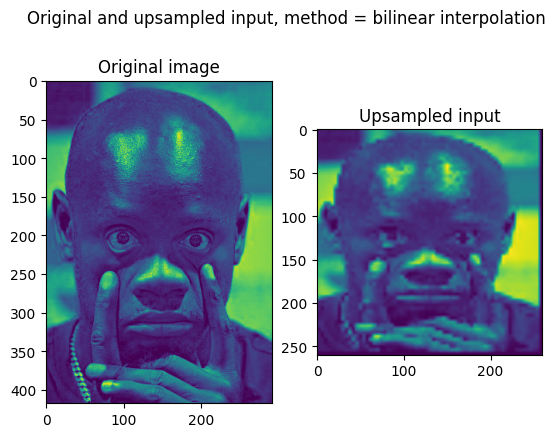

In [28]:
input_image_path=OriginalImages[1]
input_image=cv2.imread(input_image_path)

output_upsampled=UpsampleImages[1]
# Visualize input and output
fig, axes = plt.subplots(1, 2)
axes[0].imshow(input_image[:, :, 0]) 
axes[0].set_title('Original image')
axes[1].imshow(output_upsampled[:, :, 0])
axes[1].set_title('Upsampled input')
fig.suptitle(f'Original and upsampled input, method = bilinear interpolation')
plt.show()

In [35]:
len(UpsampleImages)

510

In [36]:
def detect_face(image):
    detector=MTCNN()
    bounds=detector.detect_faces(image)
    return bounds

In [37]:
def draw_bounding_boxes(image, bboxes):
    for box in bboxes:
        x,y,w,h=box['box']
        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),2)

In [38]:
def mark_key_point(image, keypoint):
    cv2.circle(image, (keypoint), 1, (0,255,0), 2)

In [39]:
image = cv2.imread(OriginalImages[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
bboxes = detect_face(image)
print("Output of MTCNN detector is...\n",bboxes)

1/1 [==============================] - 0s 110ms/step
Output of MTCNN detector is...
 [{'box': [37, 40, 167, 219], 'confidence': 0.9999855756759644, 'keypoints': {'left_eye': (86, 122), 'right_eye': (165, 119), 'nose': (130, 162), 'mouth_left': (85, 196), 'mouth_right': (171, 193)}}]


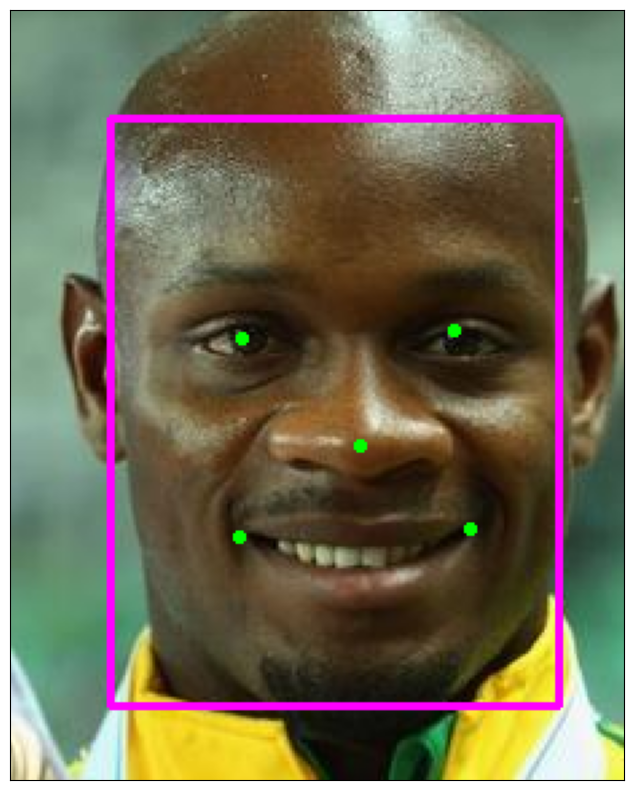

In [40]:
draw_bounding_boxes(image, bboxes)
mark_key_point(image, bboxes[0]['keypoints']['left_eye'])
mark_key_point(image, bboxes[0]['keypoints']['right_eye'])
mark_key_point(image, bboxes[0]['keypoints']['nose'])
mark_key_point(image, bboxes[0]['keypoints']['mouth_left'])
mark_key_point(image, bboxes[0]['keypoints']['mouth_right'])

# display the image
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
for i in range(len(OriginalImages)):
  image=cv2.imread(OriginalImages[i])
  image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  bboxes=detect_face(image)
  results.append(bboxes)
  print("Output of MTCNN detector is...\n",bboxes)

In [ ]:
results
#the 'box' defines the corners of the face, we need to extract that ^_^

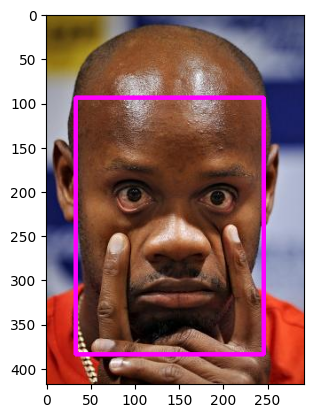

In [43]:
image=cv2.imread(OriginalImages[1])
x,y,w,h=results[1][0]['box']
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image=cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),4)
plt.imshow(image)

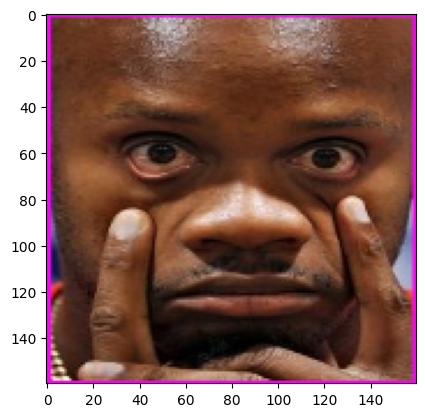

In [44]:
cropped=image[y:y+h,x:x+w]
#facenet takes in 160x160
cropped=cv2.resize(cropped,(160,160))
plt.imshow(cropped)

In [ ]:
cropped

#preprocessing

In [46]:
detector=MTCNN()

In [47]:
class Load_Face:
  def __init__(self,directory):
    #x:stores all images, y:stores all labels
    self.directory=directory
    self.size=(160,160)
    self.x=[]
    self.y=[]
    self.detector=MTCNN()

  def extract_face(self,file):
    image=cv2.imread(file)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    x,y,w,h=self.detector.detect_faces(image)[0]['box']
    x,y=abs(x),abs(y)
    cropped_face=image[y:y+h,x:x+w]
    face_array=cv2.resize(cropped_face,self.size)
    return face_array
  
  def load_faces(self,dir):
    faces=[]
    for img_name in os.listdir(dir):
      try:
        path=dir+img_name
        single_face=self.extract_face(path)
        faces.append(single_face)
      except Exception as e:
        pass
    return faces 
  
  def load_classes(self):
    for sub_dir in os.listdir(self.directory):
            path=self.directory +'/'+ sub_dir+'/'
            faces=self.load_faces(path)
            labels=[sub_dir for _ in range(len(faces))]
            print(f"Loaded successfully: {len(labels)}")
            self.x.extend(faces)
            self.y.extend(labels)
        
    return np.asarray(self.x), np.asarray(self.y)


In [ ]:
face_loading=Load_Face('/content/drive/MyDrive/dataset')
x,y=face_loading.load_classes()

In [ ]:
plt.figure(figsize=(16,16))
for num,image in enumerate(x):
    ncols=3
    nrows=len(y)//ncols+1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')

#facenet part

In [ ]:
!pip install keras-facenet

In [51]:
from keras_facenet import FaceNet
embedder=FaceNet()

In [52]:
def extract_embedding(face_img):
  face_img=face_img.astype('float32') #3d, 160x160x3
  face_img=np.expand_dims(face_img,axis=0) #facenet image is 3d, we need 4d (None*160*160*3)
  yhat=embedder.embeddings(face_img)
  return yhat[0] #512D image (1x1x512)

In [ ]:
embedded_x=[]
for img in x:
  embedded_x.append(extract_embedding(img))
embedded_x=np.asarray(embedded_x) 

In [54]:
np.savez_compressed('face_embedding.npz',embedded_x,y) #provides storage of array data using gzip compression

#svm model

In [55]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
y=encoder.transform(y)

In [56]:
len(embedded_x)

451

In [57]:
len(y)

451

In [ ]:
y

In [59]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,y_train,y_test=train_test_split(embedded_x,y,shuffle=True,random_state=17)

In [77]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [78]:
y_predict_train=model.predict(X_train)
y_predict_test=model.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_predict_train)

1.0

In [80]:
accuracy_score(y_test,y_predict_test)

0.9557522123893806

Text(0, 0.5, '50')

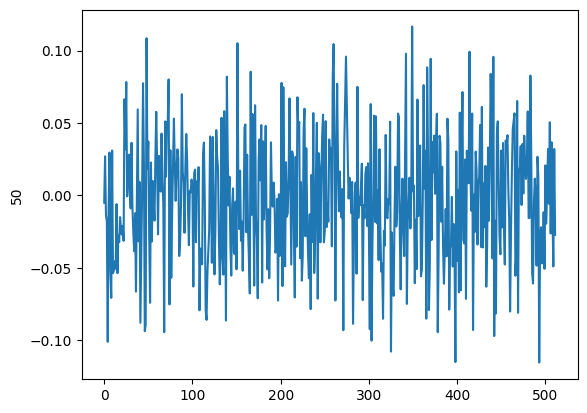

In [81]:
plt.plot(embedded_x[0]) 
plt.ylabel(y[0])

In [82]:
import pickle
#save the model
with open('svm_model_160x160.pkl','wb') as f:
    pickle.dump(model,f)

In [83]:
!pip freeze > requirements.txt

In [96]:
!mkdir test

#TESTING

In [100]:
#UpsampleImages
print(type(UpsampleImages[0]))
print(type(embedded_x[0]))
print(type(x[0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [104]:
embedded_X=[]
for img in UpsampleImages:
  embedded_X.append(extract_embedding(img))
embedded_X=np.asarray(embedded_X) 

1/1 [==============================] - 0s 107ms/step


In [105]:
np.savez_compressed('test_face_embedding.npz',embedded_X,y) #provides storage of array data using gzip compression

In [ ]:
y

In [117]:
import numpy as np
for i in range(59):
  np.append(y,np.int64(i))

In [119]:
print(type(y))

<class 'numpy.ndarray'>


In [120]:
y_new=[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 49, 49, 49, 49, 49, 49, 49,
       49, 49, 49, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 45, 45, 45, 45,
       45, 45, 45, 45, 45, 48, 48, 48, 48, 48, 48, 48, 48, 48, 46, 46, 46,
       46, 46, 46, 46, 46, 44, 44, 44, 44, 44, 44, 44, 44, 43, 43, 43, 43,
       43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 41, 41,
       41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39,
       39, 39, 39, 39, 39, 39, 38, 38, 38, 38, 38, 38, 38, 38, 38, 37, 37,
       37, 37, 37, 37, 37, 37, 37, 37, 36, 36, 36, 36, 36, 36, 36, 36, 35,
       35, 35, 35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34,
       33, 33, 33, 33, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 31, 31, 31, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 26, 26, 26,
       26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24,
       24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 19, 19,
       19, 19, 19, 19, 19,  0,  0,  0,  0,  0,  0, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,  2,
        2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 13, 13, 13, 13,
       13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15,
        5,  5,  5,  5,  5,  5,  5,  5,  5]

In [121]:
len(y_new)

451

In [123]:
for i in range(59):
  y_new.append(i)

In [124]:
len(y_new)

510

In [125]:
y_=np.array(y_new)

In [126]:
print(type(y_))

<class 'numpy.ndarray'>


In [127]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_)
y_=encoder.transform(y_)

In [128]:
len(embedded_X)

510

In [209]:
X_train,X_test,y_train,y_test=train_test_split(embedded_X,y_,shuffle=True,random_state=15)

In [210]:
from sklearn.svm import SVC
model = SVC(kernel='sigmoid', probability=True)
model.fit(X_train, y_train)

SVC(kernel='sigmoid', probability=True)

In [211]:
y_predict_train=model.predict(X_train)
y_predict_test=model.predict(X_test)

In [212]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_predict_train)

0.643979057591623

In [213]:
accuracy_score(y_test,y_predict_test)

0.6953125

Text(0, 0.5, '50')

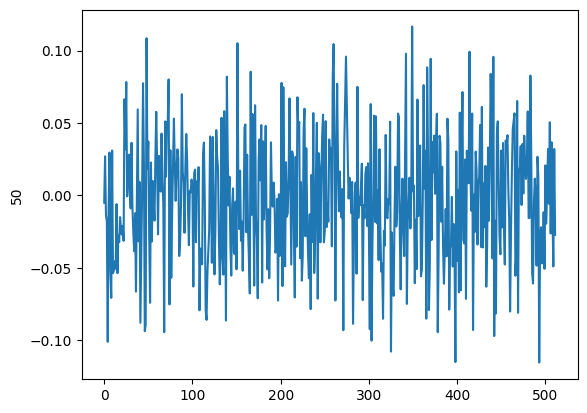

In [156]:
plt.plot(embedded_x[0]) 
plt.ylabel(y[0])